# Mini Trabalho 2
##### por Salvador Palma e Vicente Laia

In [24]:
import math
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import heapq
import copy
import random
import time
import fibheap

## Implementação de uma Estrutura de Dados Grafo seguindo uma lista de adjacências

Decidimos construir a nossa Estrutura de Dados para o Grafo do inicio em vez de seguir cegamente o que nos foi mostrado na aula, de forma a que pudessemos perceber melhor como a *Programacao Orientada para Objetos* funciona em *Python*, e também para implementar-mos o grafo sobre a forma de lista de adjacências em vez de mapa de adjacências.<br><br><br>
#### Porquê lista de adjacências?
Apesar de um mapa de adjacências possuir custos menores para certas operações, a lista de adjacências permite-nos usar a biblioteca *networkx* para representar visualmente o nosso grafo, desta forma, conseguimos obter um notebook mais apelativo.


In [25]:
class Vertice:
    #Metodo construtor
    def __init__(self, n):
        self.ID = n
        self.incoming = [] #Lista de Arestas incoming
        self.outgoing = [] #Lista de Arestas outgoing
    def __str__(self):
        return str(self.ID)
    def __eq__(self, other):
        return self.ID == other
    def __hash__(self):
        return hash(id(self))
    #Valor do vertice
    def val(self):
        return int(str(self.ID))
    #Grau do vertice
    def grau_incoming(self):
        return len(self.incoming)
    def grau_outgoing(self):
        return len(self.outgoing)
    #Lista de Vertices antecedentes
    def incoming_vertices(self):
        c=[]
        for a in self.incoming:
            c.append(a.oposto(self).ID)
        return c


In [26]:
class Aresta:
    #Metodo construtor
    def __init__(self,frm : Vertice,to : Vertice,d=0,line=0, ort=0,amrt=0,irt=0):
        self.origin : Vertice = frm
        self.destination : Vertice = to
        self.distance = d
        self.line = line
        self.offrt = ort
        self.amrt = amrt
        self.interrt = irt
    def __str__(self):
        return "({0} -> {1}): {2}".format(self.origin.ID, self.destination.ID, self.weight)
    def __eq__(self, other):
        return self.origin == other.origin and self.destination == other.destination
    def __hash__(self):
        return hash( (self.origin, self.destination) )
    #Peso da aresta mediante o tipo de medida
    def getValue(self, type : int):
        return {
            0:self.distance,
            1:1,
            2:self.offrt,
            3:self.amrt,
            4:self.interrt,
            5:self.line
        }[type]
    #Obter o vertice oposto
    def oposto(self, v):
        return self.origin if v is self.destination else self.destination
    #Obter os vertices que a aresta conecta
    def pontos(self):
        return self.origin, self.destination

In [27]:

class Grafo:
    #Metodo construtor
    def __init__(self):
        self.vertices = []
    #Adicionar um vertice
    def addVertice(self,v : Vertice):
        self.vertices.append(v)
    def addVertice(self,n : int):
        self.vertices.append(Vertice(n))
    #Obter um vertice
    def getVertice(self, n : int) -> Vertice:
        for v in self.vertices:
            if v.ID == n:
                return v
        return None
    #Adicionar uma aresta
    def addAresta(self, frm:Vertice, to:Vertice, d,l,o,a,i):
        if frm not in self.vertices:
            self.addVertice(frm)
        if to not in self.vertices:
            self.addVertice(to)
        f = self.getVertice(frm.ID)
        t = self.getVertice(to.ID)
        aresta : Aresta = Aresta(f,t, d,l,o,a,i)
        f.outgoing.append(aresta)
        t.incoming.append(aresta)
    #Obter uma aresta
    def getAresta(self,n1:int,n2:int) -> Aresta:
        v : Vertice = self.getVertice(n1)
        for a in v.outgoing:
            if a.destination.ID == n2:
                return a
        return None
    #Removar uma aresta
    def removeAresta(self,frm:int, to:int):
        v :Vertice = self.getVertice(frm)
        v2:Vertice = self.getVertice(to)
        for a in v.outgoing:
            if a.destination.ID == to:
                v.outgoing.remove(a)
        for a in v2.incoming:
            if a.origin == frm:
                v2.incoming.remove(a)
    #Obter os Vertices que precedem o Vertice(n) e os seus respetivos custos perante uma medida
    def getNextNodes(self, n: int, measure:int):
        c = {}
        v :Vertice = self.getVertice(n)
        arestas = v.outgoing
        for a  in arestas:
            c[str(a.destination)] = a.getValue(measure)
        return c

    #Obter o custo total do caminho p perante uma medida
    def getStat(self,p,m):
        if m == 5: return self.countLineSwaps(p)
        stat=0
        for i in range(len(p)-1):
            a = self.getAresta(p[i],p[i+1])
            stat+=a.getValue(m)
        return stat
    def countLineSwaps(self,p):
        c = 0
        prev = None
        for i in range(len(p)-1):
            current = self.getAresta(p[i],p[i+1]).getValue(5)
            if prev is not None:
                if prev != current:
                    c=c+1
            prev=current
        return c
    #Obter o custo total do caminho p perante todas as medidas
    def getStats(self,p):
        stats = [0,0,0,0,0,0]
        for i in range(len(p)-1):
            a = self.getAresta(p[i],p[i+1])
            if a is None: return -1,-1,-1,-1,-1,-1
            for j in range(5):
                stats[j] += a.getValue(j)
        stats[5] = self.countLineSwaps(p)
        return stats
    #Conversao para lista de adjacencias para o uso do networkX
    def adj_list(self):
        dic ={}
        for v in self.vertices:
            dic[v.ID] = v.incoming_vertices()
        return dic
    #Visualizacao do grafo com networkX
    def plot(self, nodeSize=100, fontSize=8):
        graph = nx.Graph(self.adj_list())
        nodeColors=[]
        for v in graph.nodes:
            if graph.degree[v] > 4:
                nodeColors.append('red')
            elif graph.degree[v] > 2:
                nodeColors.append('pink')
            else:
                nodeColors.append('cornflowerblue')
        pos = nx.drawing.layout.kamada_kawai_layout(graph)
        nx.draw(graph,pos, with_labels=True, node_size = nodeSize, font_size=fontSize, node_color=nodeColors)
        plt.show()
    #Visualizacao do grafo e do caminho path com networkX
    def plot_path(self, path, nodeSize=100, fontSize=8):
        graph = nx.Graph(self.adj_list())
        nodeColors=[]
        for v in graph.nodes:
            if v in path:
                nodeColors.append('orange')
            elif graph.degree[v] > 4:
                nodeColors.append('red')
            elif graph.degree[v] > 2:
                nodeColors.append('pink')
            else:
                nodeColors.append('cornflowerblue')
        pos = nx.drawing.layout.kamada_kawai_layout(graph)
        nx.draw(graph,pos, with_labels=True, node_size = nodeSize, font_size=fontSize, node_color=nodeColors)
        plt.show()
    #Visualizacao dos caminhos mais curtos perante todas as medidas
    def plot_all_paths(self, from_vertice : int, to_vertice : int):
        table = pd.DataFrame(columns=['Medida','Caminho','Distancia (Km)','Numero de Estacoes','Fora de Pico (min)','7:00-10:00 (min)','10:00-16:00 (min)','Trocas de Linha'])
        names = ['Distancia','Numero de Estacoes','Fora de Pico','7:00-10:00','10:00-16:00','Trocas de Linha']
        for i in range(6):
            path_distance = dijkstras_path(grafo,Vertice(from_vertice), Vertice(to_vertice), i)
            stats = grafo.getStats(path_distance[0])
            table.loc[i] = [names[i], path_distance[0], stats[0], stats[1], stats[2], stats[3], stats[4], stats[5]]
            print(names[i])
            grafo.plot_path(path_distance[0],50,5)
        display(table)
    def __str__(self):
        s = ""
        for v in self.vertices:
            s+= str(v) +": \n"
            for i in v.incoming:
                s+= str(i) + "; "
            s+="\n"
            for o in v.outgoing:
                s+= str(o) + "; "
            s+="\n"
        return s

#### Ler e introduzir valores de um Excel para um Grafo

In [28]:
values = pd.read_excel('LondonMetro.xlsx')
values

,Line,From Station Id,To Station Id,Distance (Kms),Off Peak Running Time (mins),AM peak (0700-1000) Running Time (Mins),Inter peak (1000 - 1600) Running time (mins)
0,1,114,140,1.74,2.23,2.50,2.50
1,1,140,237,1.40,1.88,2.00,2.00
2,1,237,185,0.90,1.50,1.50,1.50
3,1,185,281,1.27,1.92,2.06,2.06
4,1,281,246,1.71,2.23,3.13,3.13
...,...,...,...,...,...,...,...
738,5,276,216,0.51,1.17,1.50,1.50
739,5,216,41,0.32,0.93,1.00,1.00
740,5,41,253,0.55,1.70,2.00,2.09
741,5,253,174,2.27,4.27,4.50,4.50


In [29]:
grafo = Grafo()
for i,trail in values.iterrows():
    frm = int(trail['From Station Id'])
    to = int(trail['To Station Id'])
    weight = trail['Distance (Kms)']
    line = trail['Line']
    ort = trail['Off Peak Running Time (mins)']
    amrt =  trail['AM peak (0700-1000) Running Time (Mins)']
    irt = trail['Inter peak (1000 - 1600) Running time (mins)']
    grafo.addAresta(Vertice(frm),Vertice(to),weight,line,ort,amrt,irt)

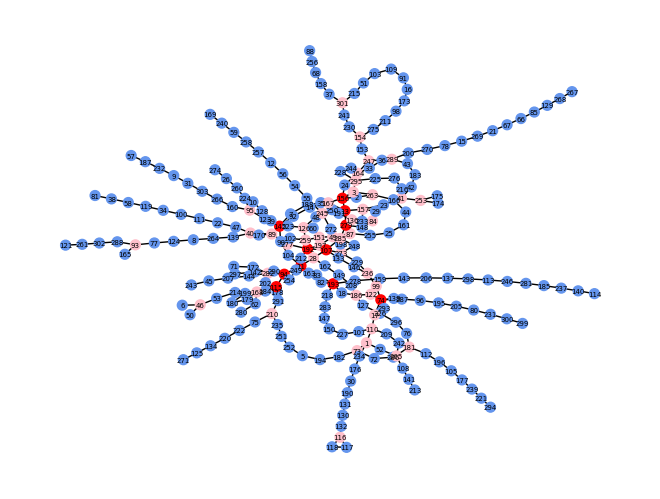

In [30]:
grafo.plot(50,5)

### 1. Implementação do Algoritmo Dijkstra usando uma Binary Heap ou Fibonacci Heap como estrutura de dados auxiliar

Abaixo encontram-se duas implementações do algoritmo **Dijkstra's**: Uma que usa uma *Fibonacci Heap* como estrutura auxiliar e uma outra que utiliza *Binary Heap*. Excluindo isto, a única diferenca entre as duas é que a **dijkstrasLineSwap** está feita de modo a contar as trocas de linhas, todas as outras medidas são calculadas pela função **dijkstras**

Para obtermos o melhor caminho descoberto pelo dijkstras utilizamos o **djisktras_path**, que funciona ao seguir o *Previous* vértice até chegar à origem.


In [31]:
def dijkstras(g : Grafo, origin : int, measure:int = 0):

    #Iniciar a Fibonacci Queue com apenas a Origem
    vertices = g.vertices
    dictionary = {}
    pq = fibheap.makefheap()
    fibheap.fheappush(pq,(0,origin))

    #Definir as distancias para todos os vertices para Infinito exceto a Origem
    for v in vertices:
        if v.ID == origin:
            dictionary[str(v)] = {'Distance':0, 'Previous':None}
        else:
            dictionary[str(v)] = {'Distance':math.inf, 'Previous':None}

    #Enquanto tivermos vertices para analisar na fila prioritaria ->
    while pq.num_nodes:
        #Obter os vertices vizinhos e os pesos das arestas que os ligam
        prevMeasure, vertexID = fibheap.fheappop(pq)
        exploring : Vertice = g.getVertice(vertexID)
        neighbors = g.getNextNodes(exploring.ID, measure)

        #Por cada vizinho ->
        for identifier,w in neighbors.items():
            #Se a distancia registada for maior que a nova distancia descoberta, atualizamos os valores e coloca-mos o vizinho na fila
            newDistance = round(dictionary[str(exploring)]['Distance'] + w, 3)
            prevDistance = dictionary[identifier]['Distance']
            if newDistance < prevDistance:
                dictionary[str(identifier)] = {'Distance':newDistance, 'Previous':exploring.val()}
                fibheap.fheappush(pq,(newDistance,int(identifier)))
    return dictionary

#Esta funcao funciona de forma extremamente semelhante a definida em cima (mas com Binary Heap)
def dijkstrasLineSwap(g : Grafo, origin : int, measure:int = 0):
    vertices = g.vertices
    dictionary = {}
    priority_queue = [(0,(origin,None))]
    for v in vertices:
        if v.ID == origin:
            dictionary[str(v)] = {'Distance':0, 'Previous':None}
        else:
            dictionary[str(v)] = {'Distance':math.inf, 'Previous':None}
    while priority_queue:
        _,prevValues = heapq.heappop(priority_queue)
        vertexID,prevLine = prevValues
        exploring : Vertice = g.getVertice(vertexID)
        neighbors = g.getNextNodes(exploring.ID, measure)
        for identifier,w in neighbors.items():
            newDistance = 0
            if prevLine==w or prevLine is None:
                newDistance = dictionary[str(exploring)]['Distance'] + 0
            else:
                newDistance = dictionary[str(exploring)]['Distance'] + 1
            prevDistance = dictionary[identifier]['Distance']
            if newDistance < prevDistance:
                dictionary[str(identifier)] = {'Distance':newDistance, 'Previous':exploring.val()}
                heapq.heappush(priority_queue, (newDistance,(int(identifier), w)))
    return dictionary


def dijkstras_path(g, origin:int, dest:int, measure:int=0):
    d = dijkstras(g,origin,measure) if measure != 5 else dijkstrasLineSwap(g,origin,measure)
    path=[]
    prev = str(dest)
    dist = d[prev]['Distance']
    #Continuar a construir o path enquanto o Vertice tiver um outro Vertice que o antecede
    while prev is not None:
        path.append(int(prev))
        prev = d[str(prev)]['Previous']
    if len(path) <= 1:
        return None,0
    return path[::-1],dist


In [32]:
d = dijkstras(grafo,Vertice(103),0)

##### Diferenças dos caminhos perante o tipo de medida pretendido

Cada aresta possui mais que uma possibilidade para o peso, estas representam: Distancia entre estações, Linha correspondente e diferentes tempos de travessia dependendo da hora do dia (fora do horário de pico, das 7 às 10 e das 10 às 16). Com isto, somos capazes de deduzir que existam caminhos diferentes dependendo do que priorizamos. Como tal, encontrámos duas estações (109 e 141) cujos caminhos entre elas diferem perante a medida escolhida de modo a demonstrar isto na prática.

Distancia


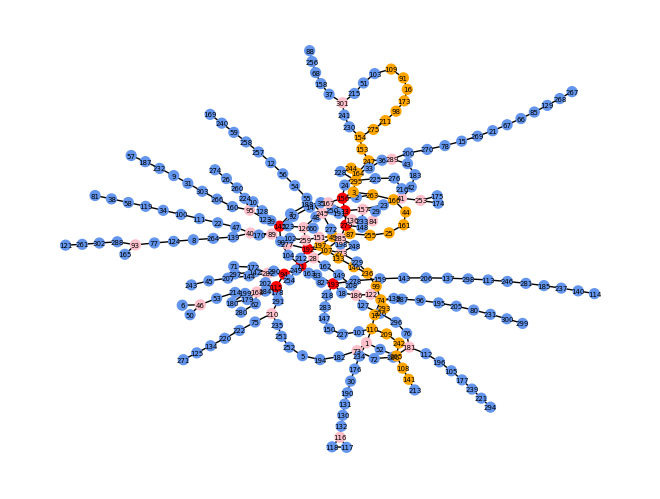

Numero de Estacoes


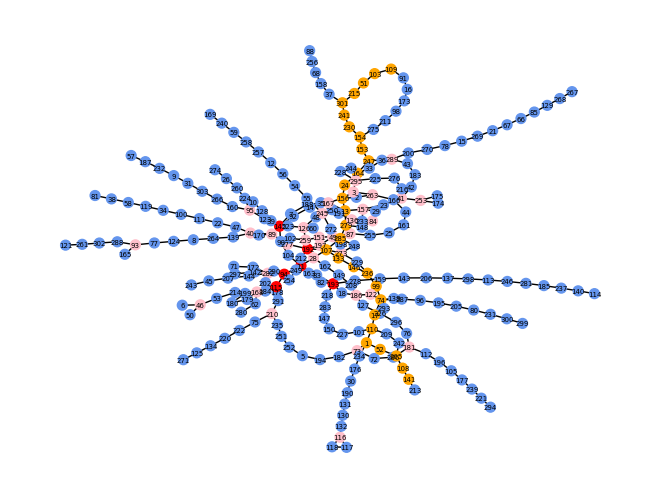

Fora de Pico


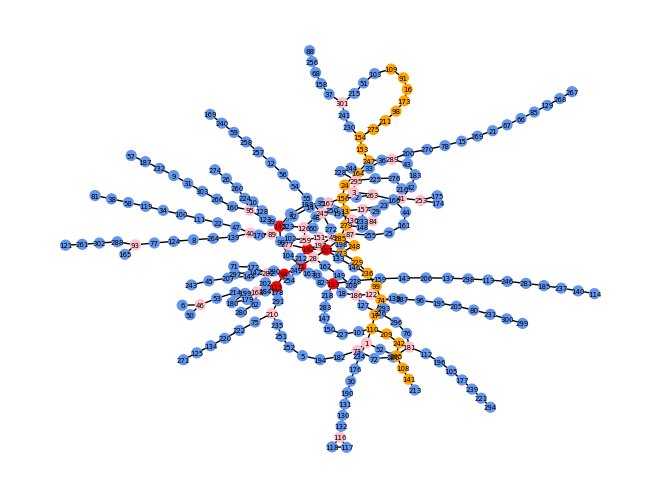

7:00-10:00


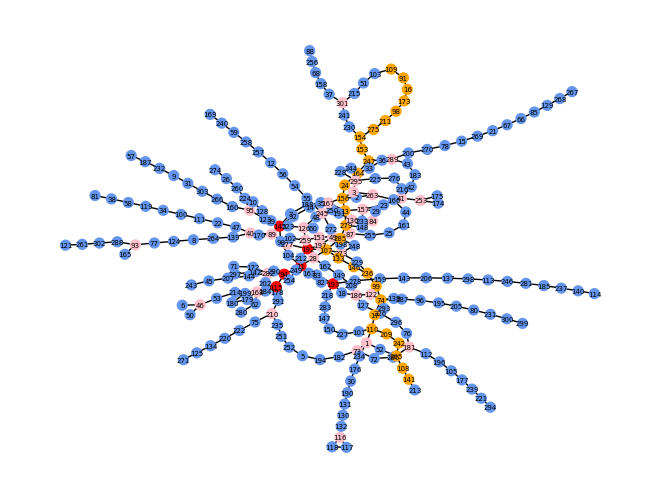

10:00-16:00


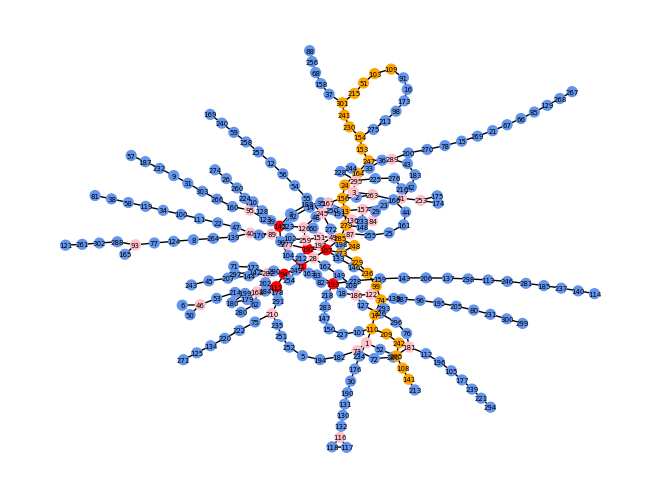

Trocas de Linha


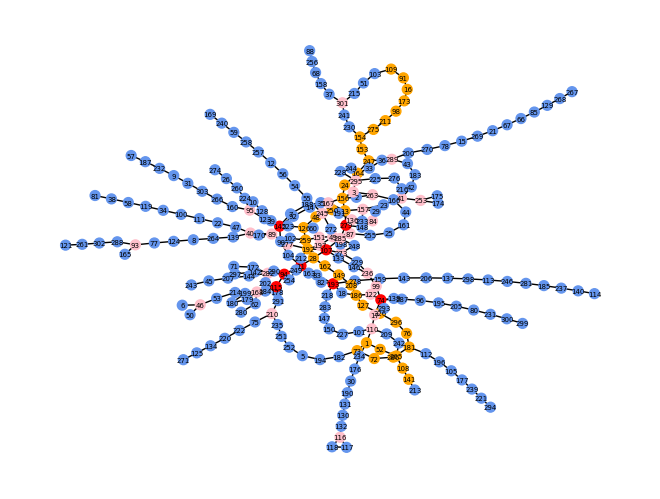

,Medida,Caminho,Distancia (Km),Numero de Estacoes,Fora de Pico (min),7:00-10:00 (min),10:00-16:00 (min),Trocas de Linha
0,Distancia,"[109, 91, 16, 173, 98, 211, 275, 154, 153, 247...",36.79,36,61.05,74.59,73.37,8
1,Numero de Estacoes,"[109, 103, 51, 215, 301, 241, 230, 154, 153, 2...",43.03,28,59.27,72.12,69.59,4
2,Fora de Pico,"[109, 91, 16, 173, 98, 211, 275, 154, 153, 247...",37.25,28,54.87,65.75,64.33,5
3,7:00-10:00,"[109, 91, 16, 173, 98, 211, 275, 154, 153, 247...",37.63,28,55.17,65.75,64.36,4
4,10:00-16:00,"[109, 103, 51, 215, 301, 241, 230, 154, 153, 2...",38.31,28,55.16,66.85,63.68,5
5,Trocas de Linha,"[109, 91, 16, 173, 98, 211, 275, 154, 153, 247...",45.58,36,67.71,82.06,82.62,3


In [33]:
grafo.plot_all_paths(109,141)

### 2. Implementação do algoritmo de Yen para determinar os k caminhos mais curtos entre 2 pontos

O algoritmo de **Yen** é um algoritmo minimamente complexo, que se apega ao algoritmo **Dijkstra's** para encontrar os K caminhos mais curtos entre dois pontos. A forma como ele funciona é a seguinte: Primeiramente, encontra o caminho mais curto através do Dijkstra's (este será definitivamente um dos caminhos mais curtos); Depois, retira uma aresta dos caminhos já considerados como mais curtos de forma a possibilitar a criação de caminhos alternativos; Após selecionar alguns caminhos alternativos candidatos, o mais curto é adicionado ao conjunto dos considerados como mais curtos, ou, caso nao haja mais caminhos alternativos, o algoritmo para; Agora simplesmente temos de repetir estes passos até obtermos o número de caminhos pretendido.



In [34]:
def Yen(og : Grafo, K, org, dest, measure=0):

    #Colocar em Shortest o caminho que e de facto o mais curto
    dPath, dCost = dijkstras_path(og,org,dest,measure)
    Shortest = [(dPath,dCost)]
    PotentialShortest = []

    #Fazer uma copia do grafo para nao termos que repor as arestas que retirar-mos futuramente
    g = copy.deepcopy(og)

    #A cada iteracao do loop k, sera encontrado um caminho mais curto
    for k in range(1,K):
        for j in range(len(Shortest[k-1][0]) - 2):
            spurNode = Shortest[-1][0][j]
            rootPath= Shortest[-1][0][:j]
            rootPathCost = og.getStat(rootPath + [spurNode],measure)

            #Remover a aresta que precede o root path
            for p in Shortest:
                if rootPath == p[0][:j]:
                    g.removeAresta(p[0][j],p[0][j+1])
                    g.removeAresta(p[0][j+1],p[0][j])

            #Remover os vertices da root path
            #Nota: O algoritmo ate que pode funcionar sem este segmento, mas ira gerar caminhos que acabam por nao fazer muito sentido.
            for v in rootPath:
                if v != spurNode:
                    inc = g.getVertice(v).incoming
                    for a in inc:
                        g.removeAresta(a.origin,a.destination)
                    out = g.getVertice(v).outgoing
                    for a in out:
                        g.removeAresta(a.origin,a.destination)

            #Calcular o proximo path mais curto apos ter retirado as arestas (e vertices)
            spurPath,spurPathCost = dijkstras_path(g,spurNode,dest,measure)
            if spurPath is None:
                continue

            #Calcular o caminho total e caso nao o tenhamos calculado previamente, adicionar a lista dos caminhos candidatos a mais curto
            totalPath = rootPath + spurPath
            totalPathCost = rootPathCost + spurPathCost
            PotentialShortestPath = [e[1] for e in PotentialShortest]
            ShortestPath = [e[0] for e in Shortest]
            if totalPath not in PotentialShortestPath and totalPath not in ShortestPath:
                heapq.heappush(PotentialShortest,(totalPathCost,totalPath))

            g = copy.deepcopy(og)
        #Caso nao tenhamos encontrado mais candidatos, paramos.
        if len(PotentialShortest) <= 0:
            break;

        #Adicionar o caminho candidato mais curto a lista do caminhos mais curtos
        NextShort = heapq.heappop(PotentialShortest)
        Shortest.append((NextShort[1],NextShort[0]))

    return [e for e in Shortest]

### 3. Testar o algoritmo no grafo procurando caminhos sobre determinados pontos

Iremos testar a nossa implementação do algoritmo de **Yen** ao determinar os 10 caminhos mais curtos entre 109 e 141

In [35]:
def show_k_best(g,frm, to, K, measure):
    y = Yen(g, K, frm,to,measure=measure)
    print("Fastest {0} Paths from {1}->{2} with measureID: {3}".format(K,frm,to,measure))
    table = pd.DataFrame(columns=['Path','Cost'])
    i=0
    for path in y:
        table.loc[i] = [path[0],g.countLineSwaps(path[0]) if measure == 5 else path[1]]
        print(path[0])
        i=i+1
        g.plot_path(path[0],50,5)
    if len(y) < K: print("Couldn't find more than {0} paths".format(len(y)))
    s = table.sort_values(by='Cost')
    s = s.reset_index(drop=True)
    display(s)


Fastest 10 Paths from 109->141 with measureID: 0
[109, 91, 16, 173, 98, 211, 275, 154, 153, 247, 164, 244, 295, 3, 263, 166, 44, 161, 25, 255, 87, 49, 197, 107, 133, 146, 236, 99, 74, 293, 17, 110, 209, 242, 265, 108, 141]


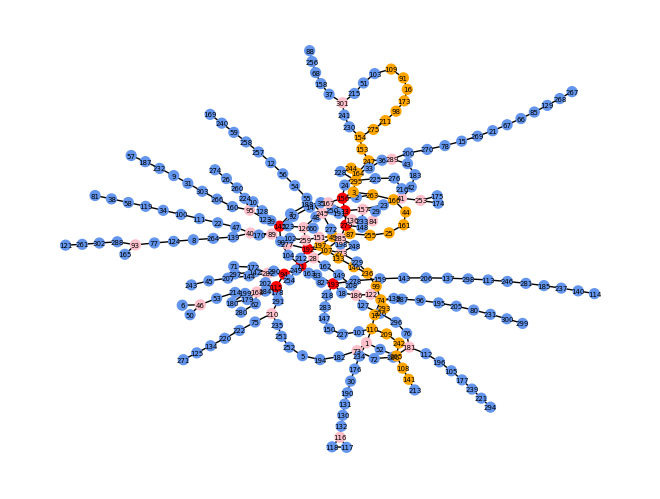

[109, 91, 16, 173, 98, 211, 275, 154, 153, 247, 164, 244, 295, 3, 263, 166, 44, 161, 25, 255, 87, 49, 197, 107, 133, 146, 236, 99, 74, 17, 110, 209, 242, 265, 108, 141]


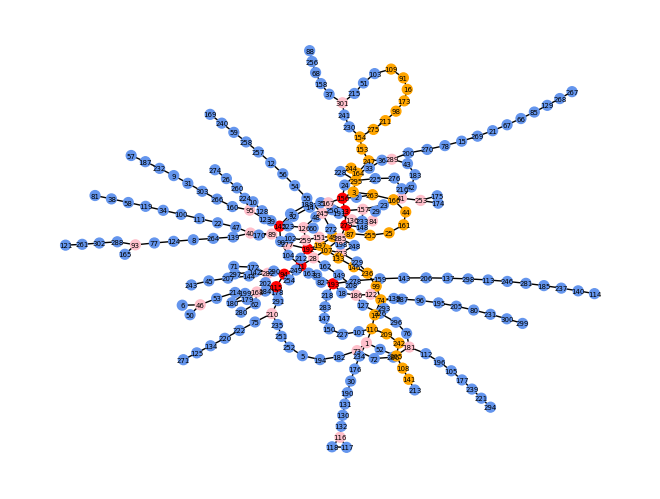

[109, 91, 16, 173, 98, 211, 275, 154, 153, 247, 164, 244, 295, 3, 156, 13, 250, 48, 126, 60, 151, 197, 107, 133, 146, 236, 99, 74, 293, 17, 110, 209, 242, 265, 108, 141]


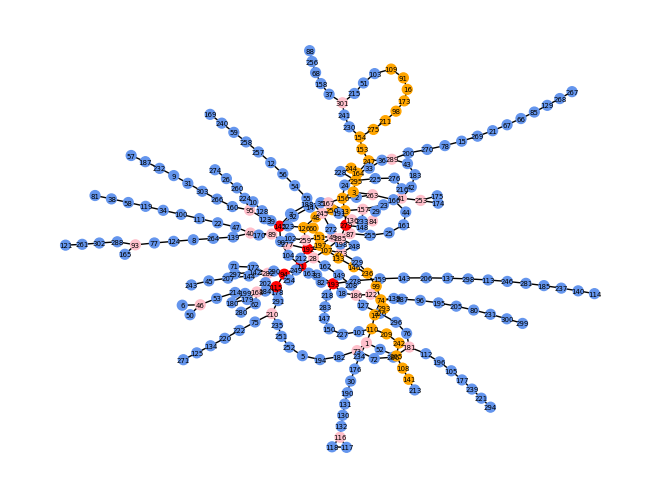

[109, 91, 16, 173, 98, 211, 275, 154, 153, 247, 164, 244, 295, 3, 263, 166, 44, 161, 25, 255, 87, 285, 248, 273, 229, 236, 99, 74, 293, 17, 110, 209, 242, 265, 108, 141]


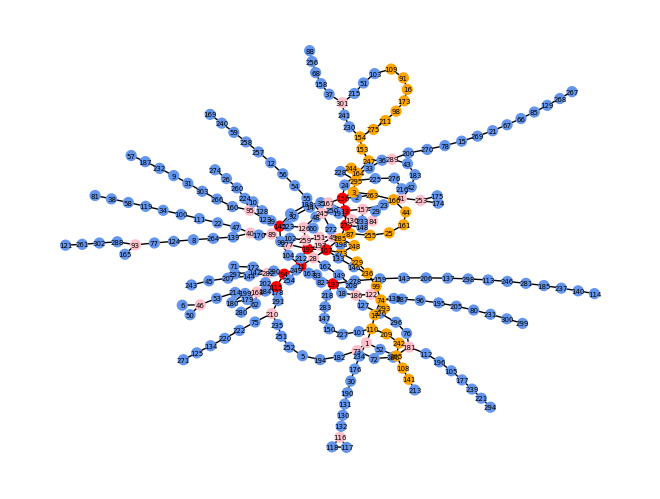

[109, 91, 16, 173, 98, 211, 275, 154, 153, 247, 164, 244, 295, 3, 263, 166, 44, 161, 25, 255, 87, 49, 151, 197, 107, 133, 146, 236, 99, 74, 293, 17, 110, 209, 242, 265, 108, 141]


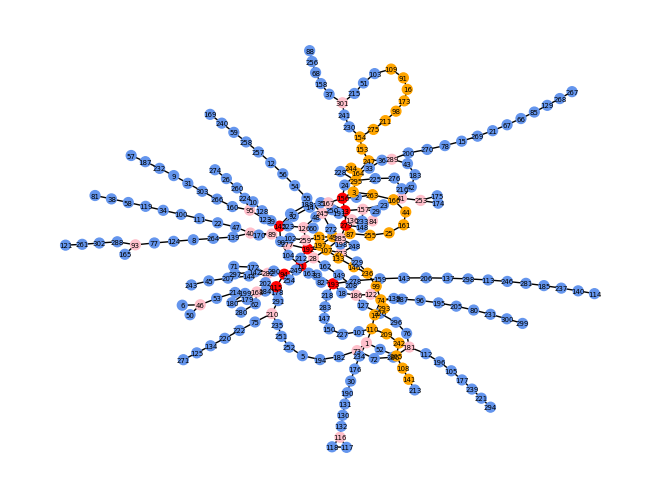

[109, 91, 16, 173, 98, 211, 275, 154, 153, 247, 164, 244, 295, 3, 263, 166, 44, 161, 25, 255, 87, 49, 197, 107, 273, 229, 236, 99, 74, 293, 17, 110, 209, 242, 265, 108, 141]


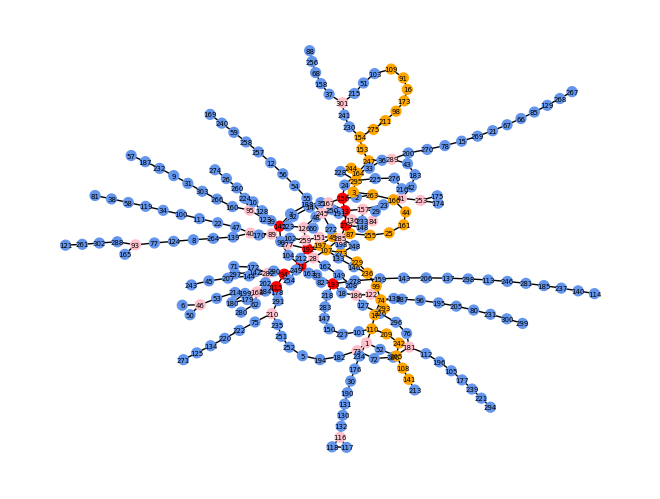

[109, 103, 51, 215, 301, 241, 230, 154, 153, 247, 164, 244, 295, 3, 263, 166, 44, 161, 25, 255, 87, 49, 197, 107, 133, 146, 236, 99, 74, 293, 17, 110, 209, 242, 265, 108, 141]


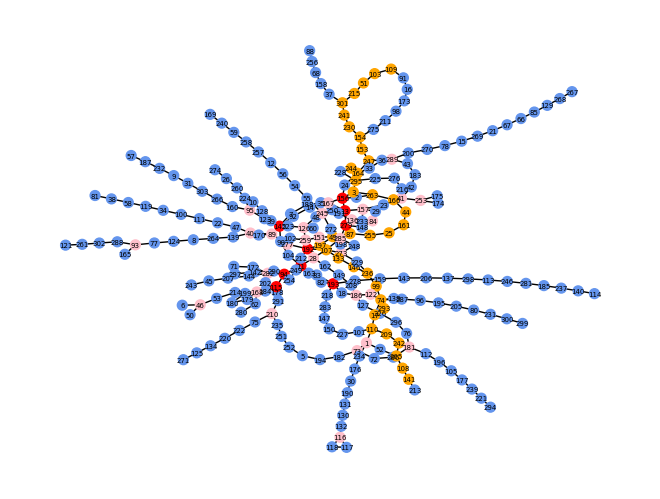

[109, 91, 16, 173, 98, 211, 275, 154, 153, 247, 164, 244, 295, 3, 263, 166, 44, 161, 25, 255, 87, 49, 197, 107, 133, 146, 236, 99, 122, 74, 293, 17, 110, 209, 242, 265, 108, 141]


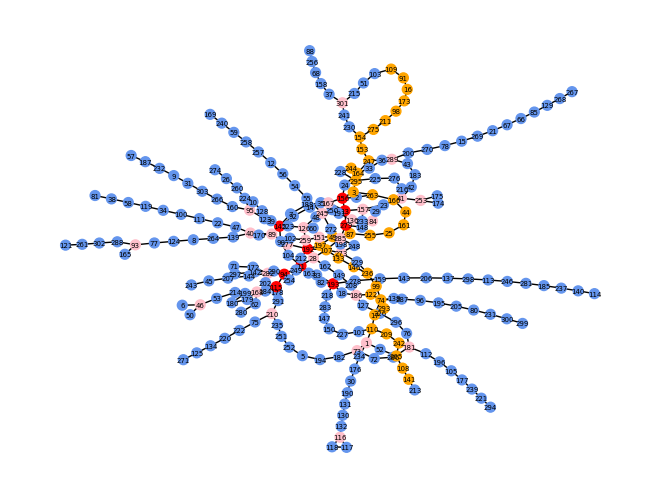

[109, 91, 16, 173, 98, 211, 275, 154, 153, 247, 289, 36, 33, 164, 244, 295, 3, 263, 166, 44, 161, 25, 255, 87, 49, 197, 107, 133, 146, 236, 99, 74, 293, 17, 110, 209, 242, 265, 108, 141]


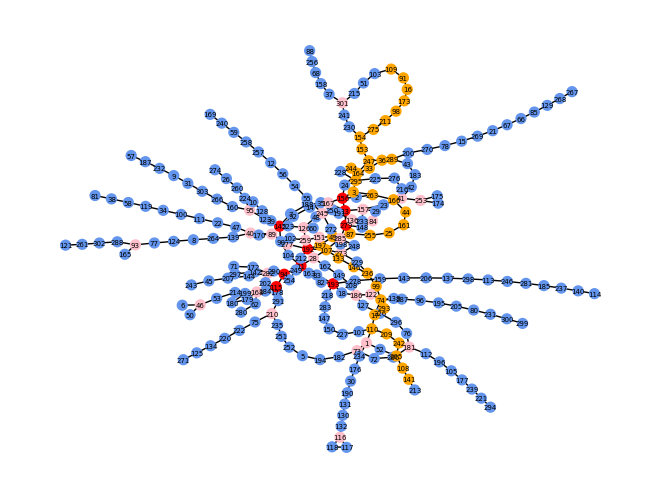

[109, 91, 16, 173, 98, 211, 275, 154, 153, 247, 164, 244, 295, 3, 263, 166, 44, 161, 25, 255, 87, 49, 197, 192, 107, 133, 146, 236, 99, 74, 293, 17, 110, 209, 242, 265, 108, 141]


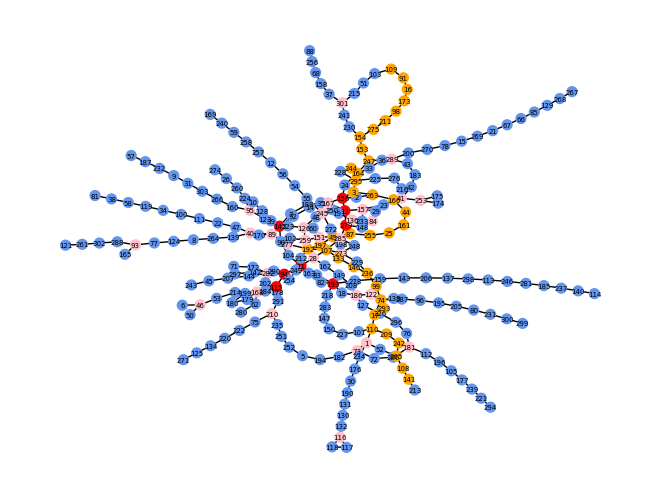

,Path,Cost
0,"[109, 91, 16, 173, 98, 211, 275, 154, 153, 247...",36.87
1,"[109, 91, 16, 173, 98, 211, 275, 154, 153, 247...",36.88
2,"[109, 91, 16, 173, 98, 211, 275, 154, 153, 247...",37.01
3,"[109, 91, 16, 173, 98, 211, 275, 154, 153, 247...",37.15
4,"[109, 91, 16, 173, 98, 211, 275, 154, 153, 247...",37.38
5,"[109, 91, 16, 173, 98, 211, 275, 154, 153, 247...",37.55
6,"[109, 103, 51, 215, 301, 241, 230, 154, 153, 2...",37.94
7,"[109, 91, 16, 173, 98, 211, 275, 154, 153, 247...",38.20
8,"[109, 91, 16, 173, 98, 211, 275, 154, 153, 247...",38.52
9,"[109, 91, 16, 173, 98, 211, 275, 154, 153, 247...",38.53


In [36]:
#Mostrar os 10 melhores caminhos entre 109 e 141
show_k_best(grafo,109,141,10,0)


### 4. Criação de uma bateria de testes para a cronometragem do algoritmo de Yen

In [37]:
def cronometragem_yen(g:Grafo, batch:int, until:int):
    X = []
    Y = []
    vertexes = grafo.vertices
    n1 = random.choice(vertexes)
    n2 = n1
    while n2 == n1:
        n2 = random.choice(vertexes)
    for k in range(until):
        X.append(k)
        res = 0
        for b in range(batch):
            start = time.time()
            Yen(g,k,n1,n2,0)
            res += time.time()-start
        res = res / batch
        Y.append(res)
    return X,Y


<function matplotlib.pyplot.show(close=None, block=None)>

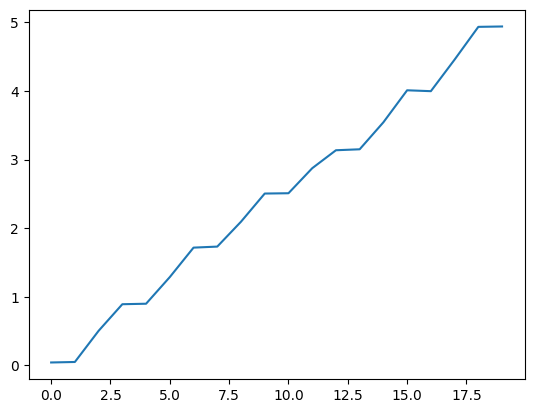

In [38]:
X,Y = cronometragem_yen(grafo, 15, 20)
plt.plot(X,Y)
plt.show

### 5. Intepretação dos resultados obtidos na alínea anterior

Os algoritmos de path-finding são bastante valiosos para o nosso dia-a-dia e podem algumas vezes passar despercebidos.
Os exemplos mais óbvios da sua aplicação e que inclusive, se encaixam com o tema do trabalho, são aplicações de navegação como a *Google Maps* e a *Moovit*.
<br>
<br>

<center><img src="Moovit.png"/></center>


<br><br>

Na imagem acima encontra-se uma ScreenShot da aplicação *Moovit* após termos selecionado como ponto de partida: *Ameixoeira*, e como ponto de chegada: *ISCTE*.
O resultado do nosso input são alguns dos melhores caminhos que podemos optar por tomar. Tambem é possivel aplicar certos filtros e ordenações de modo a obter os caminhos com o menor número de trocas de transporte, menor distancia caminhada, hora de chegada, menor tempo de viagem, etc...
<br>
Já um exemplo mais obscuro que não é propriamente notável à primeira vista são as implementações destes algoritmos na robótica, redes e/ou jogos.
O famoso jogo *Pac-Man*, lançado em 1980 para *Arcade*, é um destes casos. Neste jogo, controlamos o personagem circular e amarelo, Pac-Man, que tem como objetivo apanhar o máximo número de pellets (pintas amarelas) sem ser apanhado pelos fantasmas. Estes fantasmas possuem dois modos: patrulha e perseguição. No de patrulha o fantasma anda aleatoriamente pelo mapa, já no de perseguição ele tenta apanhar o Pac-Man, ou seja, tem de calcular a melhor rota desde a sua posição até à posição do seu alvo, e é aqui que o algoritmo Dijkstras entra em ação.
<br><br>
<center><img src="Pac-Man.png" height=400 width=400/><img src="Pac-Man2.png" height=400 width=400/></center>
<br>

<center>

<a href="https://replit.com/@iamstevendao/pacman" >Simulador/Visualizador do algoritmo Dijkstra's no jogo Pac-Man feito por iamstevendao (click me!)</a>

</center>

<br><br>

Tirando conclusões do gráfico da questão 4, podemos verificar que quanto mais informação queremos/temos, maior o tempo de execução. No caso da *Moovit*, o tempo de execução pode ser sacrificado visto que o propósito principal é criar rotas ideais aos desejos do utilizador mesmo que este processo demore uns segundos a mais. Já no caso do *Pac-Man*, o tempo de execução é fundamental pois o alvo do Fantasma encontra-se em movimento, e como tal é necessário calcular a melhor rota multiplas vezes a um ritmo elevado. Portanto, a escolha entre mais informação vs tempo de execução é algo que depende da forma como se irá tirar proveito do algoritmo.


### 6. Explicação e comparação de outros algoritmos existentes para determinar os K-caminhos mais curtos

Os grafos, são uma estrutura de dados que pode variar imenso, existem grafos conexos e não conexos, aciclicos e não aciclicos, esparsos e densos, dirigidos e não dirigidos, etc... Portanto, não seria uma surpresa saber que existem algoritmos diferentes para determinar os K-caminhos mais curtos perante a classificação do grafo e/ou com o objetivo pretendido. Neste projeto, trabalhámos com uma rede de metro de dimensão considerável, e como seria de esperar, o grafo acaba por ter bastantes ciclos para facilitar a comunicação entre linhas. Ao calcular-mos os K-caminhos mais curtos, seria preferivel considerar unicamente caminhos aciclicos, visto que se tivermos de passar duas vezes na mesma estação durante um percurso, acaba por ser inútil. Para tal acontecer, usamos o algoritmo de **Yen** $(O(KV(E+Vlog(V))))$, que é capaz de lidar com grafos ciclicos resultando em caminhos simples. Se por alguma razão quisessemos determinar caminhos com ciclos, poderiamos utilizar o algoritmo de **Eppstein** já que até acaba por ser mais rápido em grafos com poucas arestas $(O(E+KVlog(V)))$.
O algoritmo de Yen não funciona se as arestas tiverem pesos negativos, caso isso seja uma exigência, teremos de optar pelo algoritmo de **Johnson**, que se baseia em Bellman-Ford (um algoritmo de path-finding que lida com arestas negativas); Mas na nossa rede não existem valores negativos (apenas distancias, tempos, etc...), então a escolha do algoritmo de **Yen** em vez dos outros é bem justificada.